In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


In [ ]:
import matplotlib.pyplot as plt


def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
dataset = pd.read_csv(
    "training.csv"
    )

In [ ]:
dataset.head()

In [ ]:
classes = dataset.prognosis.unique()
classes

In [ ]:
#  number of classes
dataset["prognosis"].unique().shape

In [ ]:
#  number of samples for each class
dataset["prognosis"].value_counts()

In [ ]:
target_classes = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']
#  ['Fungal infection', 'Common Cold', 'Allergy','Typhoid','Malaria','Pneumonia','Tuberculosis','AIDS','Arthritis']

In [ ]:
filtered_data = dataset[dataset["prognosis"].isin(target_classes)]
filtered_data.head()

In [ ]:
label_encoder = LabelEncoder()
filtered_data['y_'] = encoded_labels = label_encoder.fit_transform(filtered_data['prognosis'])

In [ ]:
filtered_data.head()

In [ ]:
# Mapping of encoded labels to original labels
class_mappings = {encoded_label: original_label for encoded_label, original_label in zip(encoded_labels, filtered_data['prognosis'])}

# Now you can use label_mapping to see which letter is represented by which label
class_mappings

In [ ]:
filtered_data.prognosis.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
import random

train_set = pd.DataFrame()
val_set = pd.DataFrame()
test_set = pd.DataFrame()

for class_name in target_classes:
  print(class_name)
  target_set = filtered_data[filtered_data['prognosis'] == class_name]
  target_set_train, target_set_temp = train_test_split(target_set, train_size=0.7, random_state=42, shuffle=True)
  target_set_val, target_set_test = train_test_split(target_set_temp, train_size=0.3, random_state=42, shuffle=True)



  train_set = pd.concat([train_set, target_set_train])
  test_set = pd.concat([test_set, target_set_test])
  val_set = pd.concat([val_set, target_set_val])


# len(target_set)

In [ ]:
train_set.prognosis.value_counts()

In [ ]:
len(train_set),len(val_set)

In [ ]:

# Shuffle the training data
train_data = train_set.sample(frac=1, random_state=42).reset_index(drop=True)

# Shuffle the validation data
val_data = test_set.sample(frac=1, random_state=42).reset_index(drop=True)

# Shuffle the test data
test_data = test_set.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
train_data.prognosis.head()

In [ ]:
X_train = train_data.copy()
X_train = X_train.drop(["prognosis"], axis = 1)
y_train = tf.keras.utils.to_categorical(X_train["y_"], num_classes=len(target_classes))
X_train = X_train.drop(["y_"], axis = 1)

In [ ]:
X_test = test_data.copy()
X_test = X_test.drop(["prognosis"], axis = 1)
y_test = tf.keras.utils.to_categorical(X_test["y_"], num_classes=len(target_classes))
X_test = X_test.drop(["y_"], axis = 1)

In [ ]:
X_val = val_data.copy()
X_val = X_val.drop(["prognosis"], axis = 1)
y_val = tf.keras.utils.to_categorical(X_val["y_"], num_classes=len(target_classes))
X_val = X_val.drop(["y_"], axis = 1)

In [ ]:
print(f"""
X features
train samples{len(X_train)},
test sample {len(X_test)},
val samples:{len(X_val)}""")

In [ ]:
print(f"""
Y features
train samples{len(y_train)},
test sample {len(y_test)},
val samples:{len(y_val)}""")

In [ ]:
y_train

In [ ]:
X_train_tensor = tf.constant([[cell for cell in X_train.iloc[i]] for i in range(len(X_train))])
X_test_tensor = tf.constant([[cell for cell in X_test.iloc[i]] for i in range(len(X_test))])
val_data_tensor = tf.constant([[cell for cell in X_val.iloc[i]] for i in range(len(X_val))])

In [ ]:
X_train_tensor

In [ ]:
INPUT_SHAPE = X_train_tensor.shape[1]

INPUT_SHAPE

In [ ]:
num_classes =  len(target_classes)
num_classes

In [ ]:
num_classes =  len(target_classes) # Change this to the number of classes you have

model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=INPUT_SHAPE),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Use softmax for multi-class classification
])

model_0.compile(loss="categorical_crossentropy",  # Use categorical cross-entropy for multi-class classification
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_0.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=5,         # Number of epochs with no improvement to wait
                               restore_best_weights=True)

In [ ]:
epochs= 5
steps_per_epoch = len(X_train_tensor) // 32


# X_train_tensor.repeat(epochs)


In [ ]:
history_0 = model_0.fit(X_train_tensor, y_train,
                        epochs=2,
                        # steps_per_epoch=steps_per_epoch,
                        validation_data=(val_data_tensor, y_val),
                        validation_steps=len(val_data_tensor) // 5)

Epoch 1/2
104/108 [===========================>..] - ETA: 0s - loss: 2.0664 - accuracy: 0.4820

108/108 [==============================] - 8s 15ms/step - loss: 2.0074 - accuracy: 0.4956 - val_loss: 0.2260 - val_accuracy: 0.9418
Epoch 2/2
108/108 [==============================] - 1s 6ms/step - loss: 0.0419 - accuracy: 0.9968


In [ ]:
# plot_loss_curves(history_0)

In [ ]:
model_0.evaluate(X_test_tensor,y_test)

34/34 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 1.0000


[0.006227394100278616, 1.0]

In [ ]:
data_row = "0	0	0	0	0	1	0	1	0	1	1	0	1	0	0	0	0	0	1	0	1	0	0	0	1	0	0	0	0	1	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	1	1	0	1	0	1	1	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0"

In [ ]:
# Convert the data row to a list of integers
data_row_list = [int(x) for x in data_row.split('\t')]

# Convert the list to a tensor
data_tensor = tf.constant(data_row_list, dtype=tf.int32)

# If you need to reshape the tensor to match your model's input shape, you can do so like this:
desired_shape = (1, 132)  # Adjust the shape to match your model's input shape
data_tensor = tf.reshape(data_tensor, desired_shape)

In [ ]:
data_tensor

<tf.Tensor: shape=(1, 132), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [ ]:
pred = model_0.predict(data_tensor)

1/1 [==============================] - 0s 159ms/step


In [ ]:
# Multiply by 100 to convert to percentages
percentages = [x * 100 for x in pred[0]]

# Create a list of tuples containing index and percentage
percentage_tuples = list(enumerate(percentages))

# Sort the list of tuples in descending order based on the percentage
percentage_tuples.sort(key=lambda x: x[1], reverse=True)

# Get the top 4 percentages
top_4_percentages = percentage_tuples[:4]

# Print the top 4 diseases and their corresponding percentages
for index, percentage in top_4_percentages:
    disease = class_mappings[index]
    print(f"{disease}: {percentage:.2f}%")

Common Cold: 57.37%
Chicken pox: 41.52%
(vertigo) Paroymsal  Positional Vertigo: 0.35%
Hepatitis E: 0.29%


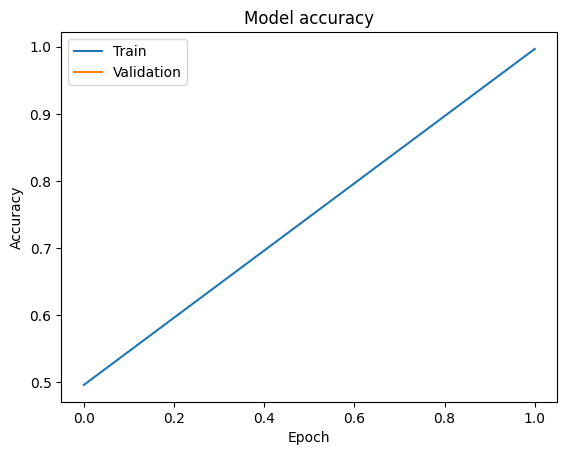

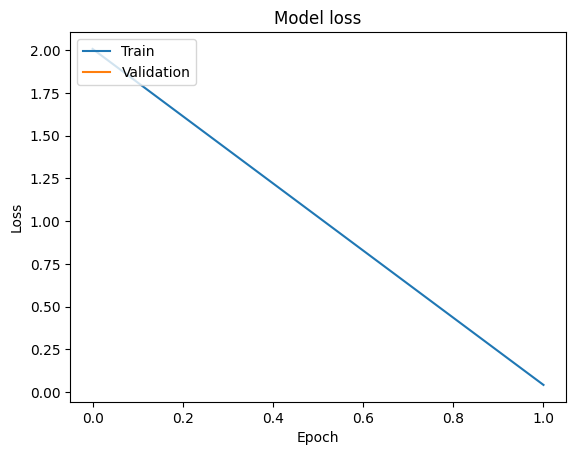

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_0.history['accuracy'])
plt.plot(history_0.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model_0.save("/content/drive/MyDrive/ML_models/health_disease")

In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/ML_models/health_disease")
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("/content/drive/MyDrive/ML_models/health_disease/model.tflite", "wb") as f:
    f.write(tflite_model)